In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

## Zadanie 1

In [46]:
def RTable(img, threshold):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, bin = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    bin = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, np.ones((3,3)))
    bin = ~bin.astype(np.uint8)
    plt.imshow(bin, cmap='gray')
    plt.show()

    contours, hierarchy = cv2.findContours(bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    plt.imshow(cv2.drawContours(img, contours , -1, (255,0,0) ))
    plt.show()

    sobelx = cv2.Sobel(bin, cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(bin,cv2.CV_64F,0,1,ksize=5)
    sobelx = sobelx/np.amax(sobelx)
    sobely = sobely/np.amax(sobely)
    gradient = np.sqrt(sobelx**2 + sobely**2)
    gradient = gradient/np.amax(gradient)
    plt.imshow(sobelx.astype(np.float32))
    plt.show()
    plt.imshow(sobely.astype(np.float32))
    plt.show()
    plt.imshow(gradient.astype(np.float32))
    plt.show()
    alpha = np.arctan2(sobelx,sobely)
    plt.imshow(alpha.astype(np.float32))
    plt.show()

    moments_img = cv2.moments(bin, 1)
    RTable = [[] for _ in range (360) ]
    xc, yc = (moments_img['m01']/moments_img['m00'], moments_img['m10']/moments_img['m00'] )
    for i in range(contours[0].shape[0]):
        (x,y) = contours[0][i,0,:]
        alpha_t = -np.arctan2(xc-x,yc-y)+np.pi/2
        norm = np.sqrt((xc-x)**2+(yc-y)**2)
        theta = round(alpha[x,y]*360/(2*np.pi)+90)
        RTable[theta].append((norm,alpha_t))
    
    return RTable, contours, xc, yc, gradient


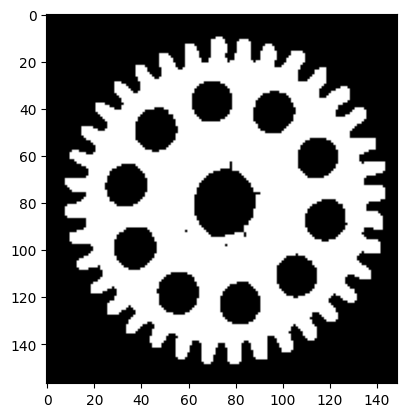

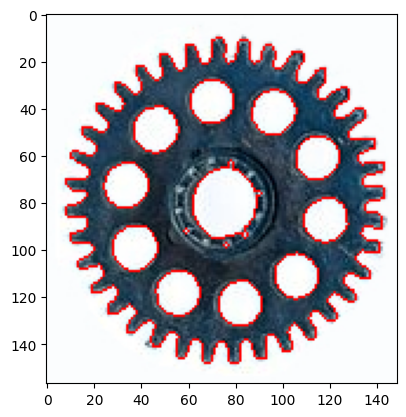

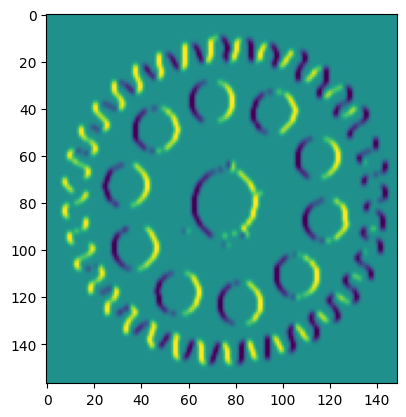

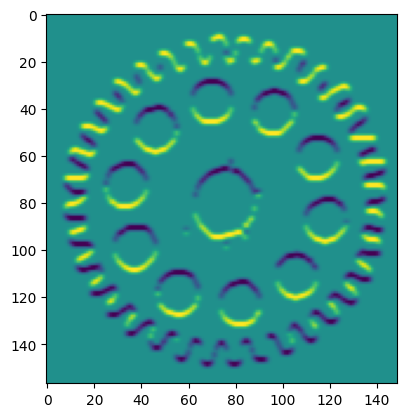

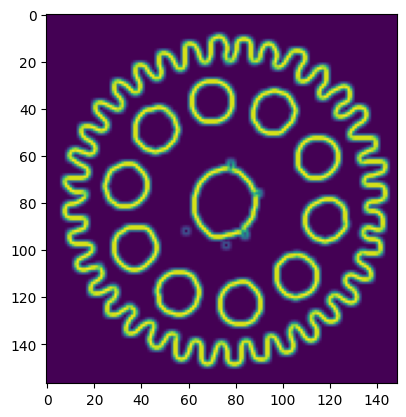

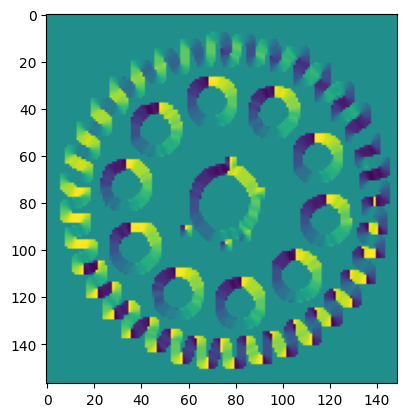

In [47]:
trybik = cv2.imread('trybik.jpg')
table, contours, xc, yc, gradient = RTable(trybik, 225)

In [48]:
def find(img, threshold, rtable, contours, xc, yc, gradient):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    th, bin = cv2.threshold(img_gray, threshold, 255 , cv2.THRESH_BINARY)
    bin = ~bin
    bin = cv2.morphologyEx(bin, cv2.MORPH_CLOSE, np.ones((3,3)))
    plt.imshow(bin, cmap='gray')
    plt.show()

    hough = np.zeros(np.array(bin.shape)+40)
    sobelx = cv2.Sobel(bin, cv2 . CV_64F ,1 ,0 , ksize =5)
    sobely = cv2 . Sobel (bin, cv2 . CV_64F ,0 ,1 , ksize =5)
    sobelx = sobelx/np.amax(sobelx)
    sobely = sobely/np.amax(sobely)
    gradient = np.sqrt(sobelx**2 + sobely**2)
    gradient = gradient/np.amax(gradient)
    alpha = np.arctan2(sobelx,sobely)
    plt.imshow(alpha.astype(np.float32))
    plt.show()

    for i in range(gradient.shape[0]):
        for j in range(gradient.shape[1]):
            if(gradient[i,j]>0.5):
                fi = alpha[i,j]
                for pair in rtable[round(fi*360/(2*np.pi)+90)]:
                    (r, alp) = pair
                    x1 = round(r* np . cos ( alp ) + i) #+ img_.shape[0]//2
                    y1 = round(r* np . sin ( alp ) + j) #+ img_.shape[1]//2
                    hough[x1,y1] += 1
    plt.imshow(6*hough.astype(np.float32)/np.max(hough.astype(np.float32)),cmap='gray')
    plt.show()

    # [ m_x ], [ m_y ] = np . where ( hough . max () == hough )
    temp = list(contours[0].shape)
    temp.insert(0, 1)
    # contour_temp = tuple((np.array(contours)-np.array([xc, yc])+np.array([m_x,m_y])))

    plt.imshow(img)
    delta = 80
    max_lst = []
    hough = cv2.GaussianBlur(hough, (5,5), 0)
    for max in range(0, 5):
        temp = np.unravel_index(np.argmax(hough), hough.shape)
        max_lst.append(temp)
        hough[temp[0]-delta:temp[0]+delta, temp[1]-delta:temp[1]+delta] = 0
        plt . plot ([ temp[1] ], [ temp[0] ] ,'*', color ='r')

    plt.imshow(img)
    for (x,y) in max_lst:
        cnt = deepcopy(np.array(contours,dtype=np.ndarray))
        for i in range(cnt.shape[0]):
            for j in range(cnt[i].shape[0]):
                for k in range(cnt[i].shape[1]):
                    cnt[i][j,k,:] -= np.array([yc, xc],dtype=np.int32)-np.array([y,x],dtype=np.int32)

        cv2.drawContours( img, cnt , -1, (255,0,0) )
        plt . plot ([ y ], [ x ] ,'*', color ='r')
    plt.imshow(img)

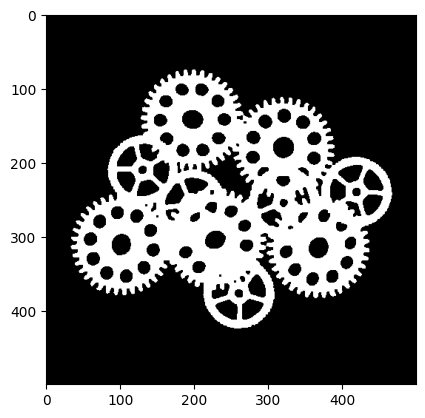

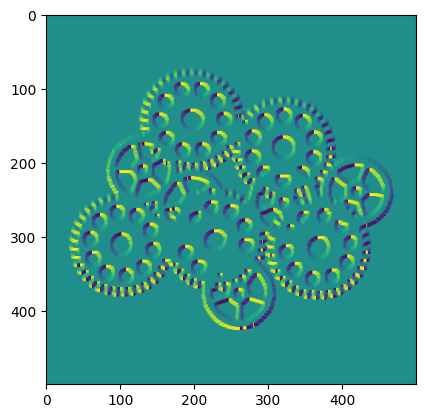

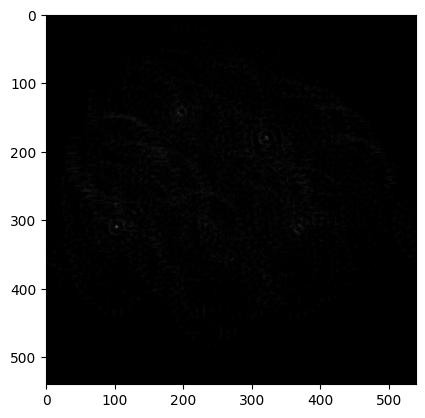

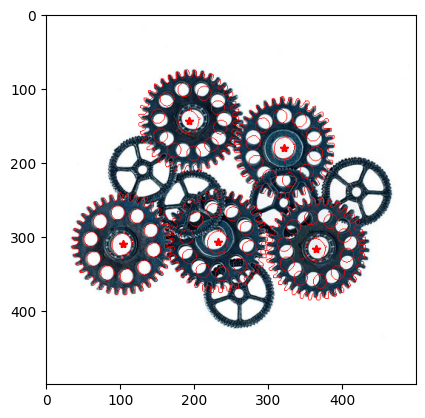

In [49]:
img = cv2.imread("trybiki2.jpg")
find(img, 215, table, contours, xc, yc, gradient)

## Task 2

In [50]:
def RTable_2(img, threshold):
    # Convert to grayscale and binarize
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, bin_img = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))
    bin_img = ~bin_img  # Invert

    plt.imshow(bin_img, cmap='gray')
    plt.title('Binary Template')
    plt.show()

    # Find contours
    contours, _ = cv2.findContours(bin_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    img_with_contours = img.copy()
    cv2.drawContours(img_with_contours, contours, -1, (255, 0, 0), 1)
    plt.imshow(img_with_contours)
    plt.title('Contours')
    plt.show()

    # Compute gradients
    sobelx = cv2.Sobel(bin_img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(bin_img, cv2.CV_64F, 0, 1, ksize=5)

    sobelx /= np.max(np.abs(sobelx)) if np.max(np.abs(sobelx)) > 0 else 1
    sobely /= np.max(np.abs(sobely)) if np.max(np.abs(sobely)) > 0 else 1

    gradient = np.sqrt(sobelx**2 + sobely**2)
    gradient /= np.max(gradient) if np.max(gradient) > 0 else 1

    alpha = np.arctan2(sobely, sobelx)

    # Visualization
    plt.imshow(alpha, cmap='gray')
    plt.title('Gradient Orientation')
    plt.colorbar()
    plt.show()

    # Calculate center of mass
    moments_img = cv2.moments(bin_img, binaryImage=True)
    xc = moments_img['m10'] / moments_img['m00']
    yc = moments_img['m01'] / moments_img['m00']

    # Build R-table
    RTable = [[] for _ in range(360)]
    contour = contours[0]  # Use the main contour

    for i in range(contour.shape[0]):
        x, y = contour[i, 0]
        r = np.sqrt((xc - x)**2 + (yc - y)**2)
        angle_to_center = -np.arctan2(xc - x, yc - y) + np.pi / 2

        theta = int(round(np.degrees(alpha[y, x]))) % 360
        RTable[theta].append((r, angle_to_center))

    return RTable, contour, xc, yc, gradient

In [57]:

def find_2(img, threshold, rtable, contour, xc, yc, template_gradient):
    # Preprocessing
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, bin_img = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    bin_img = ~bin_img
    bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, np.ones((3, 3), dtype=np.uint8))

    plt.imshow(bin_img, cmap='gray')
    plt.title('Binary Image')
    plt.show()

    # Prepare Hough space (x, y, rotation)
    hough_shape = (bin_img.shape[0] + 40, bin_img.shape[1] + 40, 36)
    hough_space = np.zeros(hough_shape, dtype=np.float32)

    # Compute gradients and orientation
    sobelx = cv2.Sobel(bin_img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(bin_img, cv2.CV_64F, 0, 1, ksize=5)

    sobelx /= np.max(np.abs(sobelx)) if np.max(np.abs(sobelx)) > 0 else 1
    sobely /= np.max(np.abs(sobely)) if np.max(np.abs(sobely)) > 0 else 1

    gradient = np.sqrt(sobelx**2 + sobely**2)
    gradient /= np.max(gradient) if np.max(gradient) > 0 else 1
    alpha = np.arctan2(sobely, sobelx)

    plt.imshow(alpha, cmap='gray')
    plt.title('Gradient Orientation')
    plt.colorbar()
    plt.show()

    # Vote in Hough space
    for i in range(gradient.shape[0]):
        for j in range(gradient.shape[1]):
            if gradient[i, j] > 0.5:
                theta = int(round(np.degrees(alpha[i, j]))) % 360
                for rotation in range(0, 360, 10):
                    df = np.radians(rotation)
                    rotation_bin = (rotation // 10) % 36
                    for r, fi in rtable[theta]:
                        x_vote = int(round(-r * np.cos(fi + df) + j))
                        y_vote = int(round(-r * np.sin(fi + df) + i))

                        if 0 <= x_vote < hough_shape[1] and 0 <= y_vote < hough_shape[0]:
                            hough_space[y_vote, x_vote, rotation_bin] += 1

    hough_shape = cv2.GaussianBlur(hough_shape, (5,5), 0)

    # Find top 5 maxima
    delta = 95
    max_lst = []
    for _ in range(5):
        idx = np.argmax(hough_space)
        y, x, theta_idx = np.unravel_index(idx, hough_space.shape)
        max_lst.append((x, y, theta_idx * 10))
        hough_space[max(0, y - delta):y + delta, max(0, x - delta):x + delta, :] = 0

    # Draw results
    output_img = img.copy()
    for x, y, angle in max_lst:
        M = cv2.getRotationMatrix2D((xc, yc), -angle, 1.0)
        transformed_contour = cv2.transform(contour, M)
        translated_contour = transformed_contour + np.array([[x - xc, y - yc]], dtype=np.int32)
        cv2.drawContours(output_img, [translated_contour], -1, (255, 0, 0))
        plt.plot([x], [y], '*', color='red')

    plt.imshow(output_img)
    plt.title('Detected Patterns')
    plt.show()

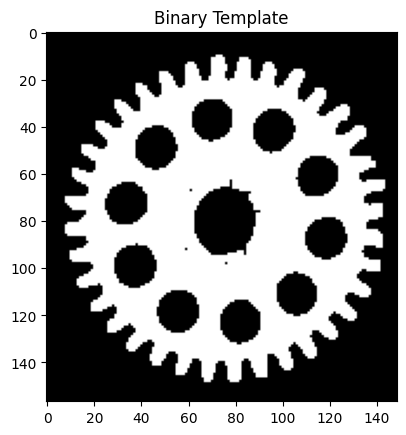

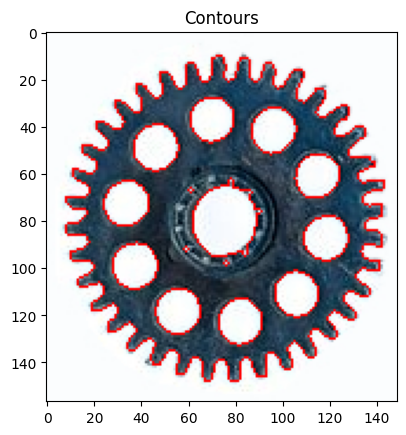

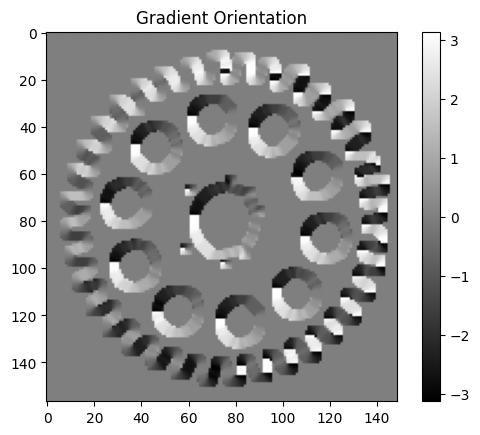

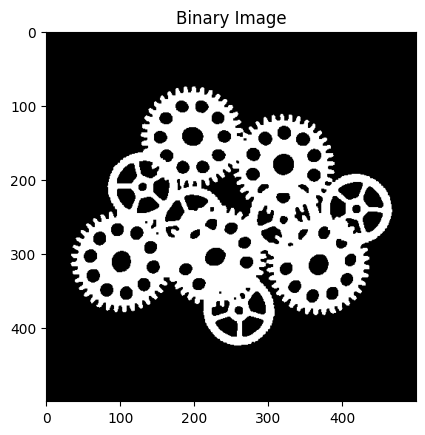

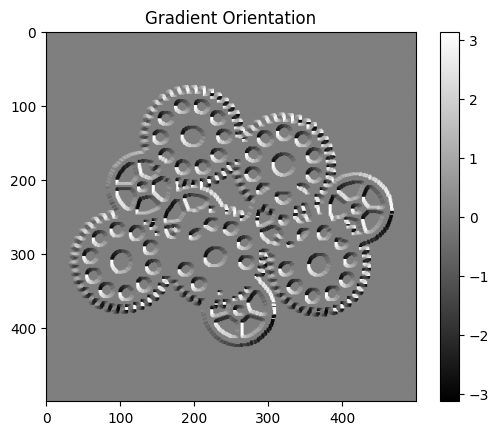

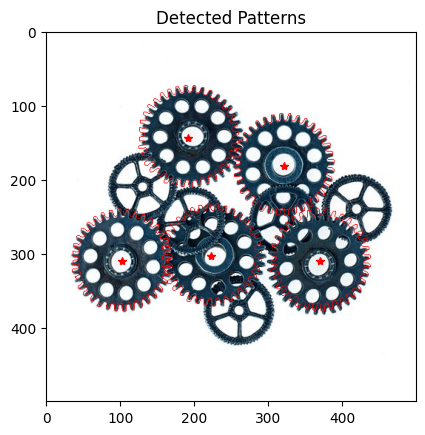

In [58]:
trybik2 = cv2.imread('trybik.jpg')
table2, contours2, xc2, yc2, gradient2 = RTable_2(trybik2, 215)

img2 = cv2.imread("trybiki2.jpg")
find_2(img2, 215, table2, contours2, xc2, yc2, gradient2)